In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression

# Task 2

Let
$$
I(t) = \int_0^t \mu(s) \, dW(s),
$$ 

where

$$
\mu(t) = 
\begin{cases} 
1, & t \in [0, 1), \\
2, & t \in [1, 2), \\
5, & t \in [2, 3), \\
-1, & t \in [3, 4), \\
-5, & t \in [4, 5).
\end{cases}
$$



## (a)

Simulate and plot one path of $W(t)$ and the corresponding path of $I(t)$. Plot
$\mu(t)$ and display periods with dashed vertical lines.

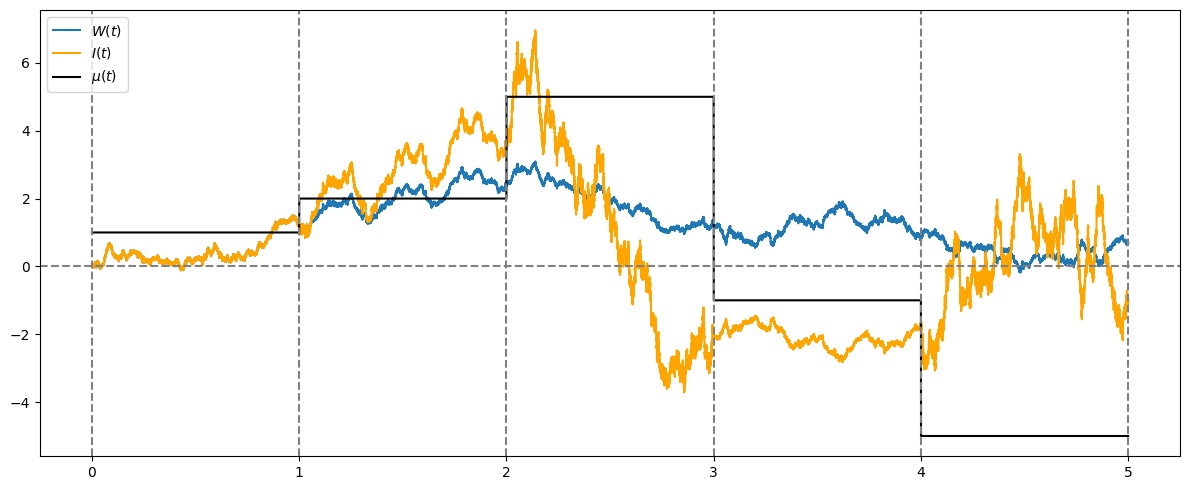

In [ ]:
T = 5
n = 100000
dt = T / n
times = np.linspace(0, T, n + 1)
mu = np.where((0 <= times) & (times < 1), 1,
              np.where((1 <= times) & (times < 2), 2,
              np.where((2 <= times) & (times < 3), 5,
              np.where((3 <= times) & (times < 4), -1,
              np.where((4 <= times) & (times < 5), -5, None)))))
dW = np.random.normal(0, np.sqrt(dt), size=n)
W = np.concatenate(([0], np.cumsum(dW)))

I = np.zeros(n + 1)
for i in range(1, n + 1):
    I[i] = I[i - 1] + mu[i - 1] * (W[i] - W[i - 1])


plt.figure(figsize=(12, 5))
plt.plot(times, W, label = '$W(t)$')
plt.plot(times, I, color = 'orange', label = '$I(t)$')
plt.plot(times, mu, color = 'black', label = '$\mu(t)$')
plt.axhline(0, linestyle='dashed', color = 'gray')
for i in range(6):
  plt.axvline(i, linestyle='dashed', color = 'gray')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

## (b)

Simulate 300 paths of $W(t)$ and corresponding $I(t)$. Using 2 different colors
for $W(t)$ and $I(t)$, plot both processes at another graph below (make the lines semitransparent so the ”distribuiton” is visible). Plot $\mu(t)$ and display periods with dashed
vertical lines.

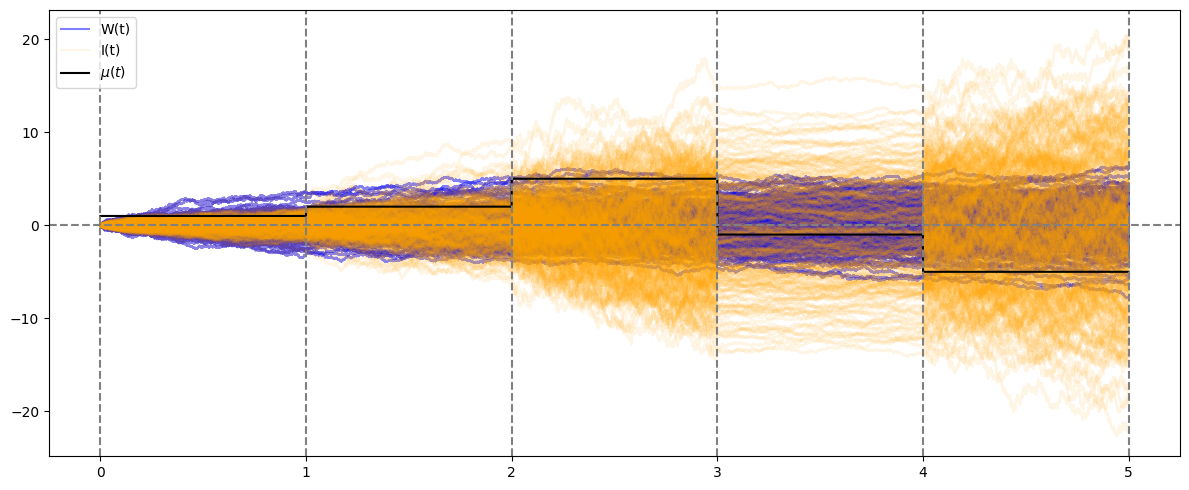

In [ ]:
num_paths = 300
W_paths = np.zeros((num_paths, n+1))
I_paths = np.zeros((num_paths, n+1))

for j in range(num_paths):
    dW = np.random.normal(0, np.sqrt(dt), size=n)
    W_paths[j] = np.concatenate(([0], np.cumsum(dW)))

    for i in range(1, n+1):
        I_paths[j][i] = I_paths[j][i-1] + mu[i-1] * (W_paths[j][i] - W_paths[j][i-1])

plt.figure(figsize=(12, 5))
for j in range(num_paths):
    plt.plot(times, W_paths[j], color='blue', alpha=0.5, label='W(t)' if j == 0 else "")
for j in range(num_paths):
    plt.plot(times, I_paths[j], color='orange', alpha=0.1,  label='I(t)' if j == 0 else "")
plt.plot(times, mu, color = 'black', label = '$\mu(t)$')
plt.axhline(0, linestyle='dashed', color = 'gray')
for i in range(6):
  plt.axvline(i, linestyle='dashed', color = 'gray')

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## (c)

Plot sample and analytical mean, 5\% and 95\% quantiles. Compare them. For
the mean, and then for the quantiles, find sufficient amount of simulations, so that sample
mean/quantiles match nicely with the analytical mean/quantiles. Comparing visually is
enough, no need to use strict statistical criterias, but feel free to use one if you want to.

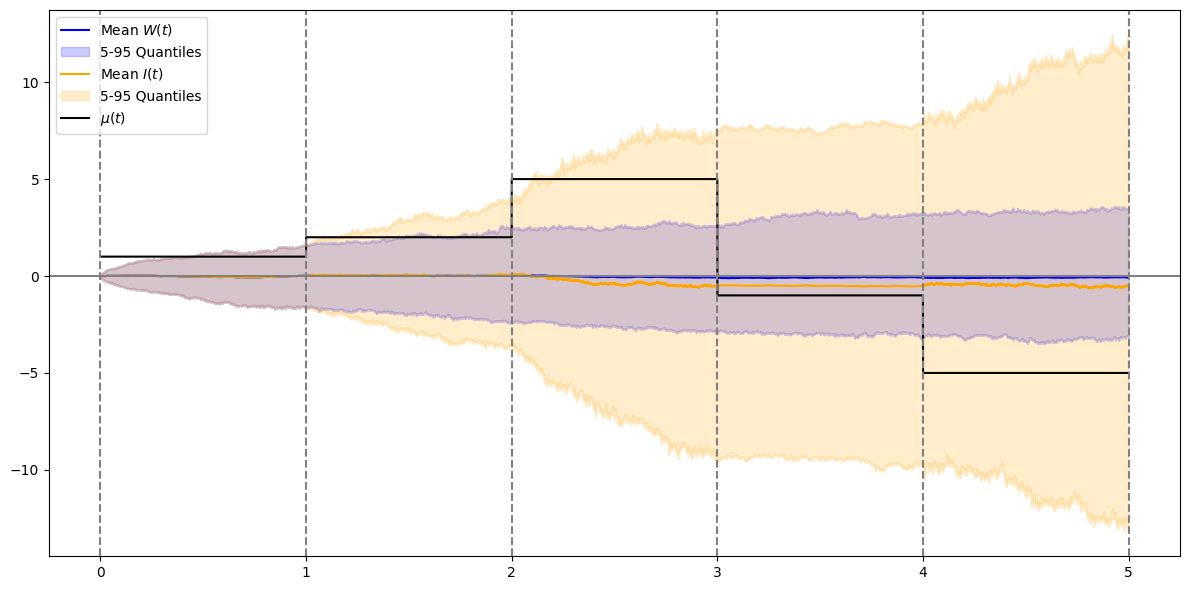

In [ ]:
mean_W = np.mean(W_paths, axis=0)
mean_I = np.mean(I_paths, axis=0)
q_W_5 = np.quantile(W_paths, 0.05, axis=0)
q_W_95 = np.quantile(W_paths, 0.95, axis=0)
q_I_5 = np.quantile(I_paths, 0.05, axis=0)
q_I_95 = np.quantile(I_paths, 0.95, axis=0)

plt.figure(figsize=(12, 6))

plt.plot(times, mean_W, color='blue', label='Mean $W(t)$')
plt.fill_between(times, q_W_5, q_W_95, color='blue', alpha=0.2, label='5-95 Quantiles')
plt.plot(times, mean_I, color='orange', label='Mean $I(t)$')
plt.fill_between(times, q_I_5, q_I_95, color='orange', alpha=0.2, label='5-95 Quantiles')
plt.plot(times, mu, color = 'black', label = '$\mu(t)$')
plt.axhline(0, color = 'gray')
for i in range(6):
  plt.axvline(i, linestyle='dashed', color = 'gray')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

Here we can clearly see how the variance of the process depends on $\mu$ - the larger the value of the step function, the faster the region between 5-95 quantiles (and, consequently, the variance) grows with time.

# Task 3

For $t ≥ 0$, let $W(t)$ be a Brownian motion and $B(t) =  W (t) − \int_0^t W (s)ds$.

(a) Express $B(t)$ as an Ito process (look at the definition of Ito process).
Hint: express both $W (t)$ and $\int_0^t W (s)ds$ as Ito’s integrals. For the latter, apply Ito’s lemma
to $tW(t)$.

(b) Find the distribution of the $B(t)$.

(c) Let $t = 1$. Discretize the process for some finite k and give an intuitive explanation of the nature of this discrete process. Give the intuition for the continuous $B(1)$.
What real life processes would you describe using $B(1)$? Give the intuition for the $B(t)$
when $0 < t < 1$.

## (d) and (e)

Simulate one path of $W (t)$ and the corresponding path of $B(t)$. Plot both
paths.

Using 2 different colors for $W (t)$ and $B(t)$, plot both processes at another graph
below (make the lines semi-transparent so the ”distribuiton” is visible)

Here I decided to realise numerically three processes - the Brownian motion itself, the process $B(t)$ by definition from the task, and the process $B(t)$ by the formula I expressed (in the graphs I denote as $B(t) \; expressed$). This was very convenient, because at the first attempt the distributions of the two ways of calculating $B$ turned out to be different:)

In [ ]:
# simulating integral

n = 50000

def one_path(T):
  dt = T / n
  dW = np.random.normal(0, np.sqrt(dt), size=n)
  W = np.concatenate(([0], np.cumsum(dW)))
  times = np.linspace(0, T, n + 1)

  B = np.zeros(n + 1)
  C = np.zeros(n + 1)
  integral_W = np.zeros(n + 1)

  for j in range(1, n + 1):
      integral_W[j] = integral_W[j - 1] + W[j - 1] * dt
      t = times[j]
      s = times[:j]
      B[j] = np.sum((1 + s - t) * dW[:j])
  C = W - integral_W

  plt.figure(figsize=(12, 6))
  plt.plot(times, W, label='W(t)', color='blue')
  plt.plot(times, B, linewidth = 3, label='expressed B(t)', color='orange', alpha=0.7)
  plt.plot(times, C, linewidth = 0.5, label='B(t)', color='green')
  plt.xlabel('Time')
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

def many_paths(T, num_paths):
  dt = T / n
  dW = np.random.normal(0, np.sqrt(dt), size=n)
  W = np.concatenate(([0], np.cumsum(dW)))
  times = np.linspace(0, T, n + 1)
  W_paths = np.zeros((num_paths, n+1))
  B_paths = np.zeros((num_paths, n+1))
  C_paths = np.zeros((num_paths, n+1))
  intW = np.zeros((num_paths, n+1))

  for j in range(num_paths):
      dW = np.random.normal(0, np.sqrt(dt), size=n)
      W_paths[j] = np.concatenate(([0], np.cumsum(dW)))
      for i in range(1, n+1):
          t = times[i]
          s = times[:i]
          B_paths[j][i] = np.sum((1 + s - t) * dW[:i])
          intW[j][i] = intW[j][i - 1] + W_paths[j][i-1] * dt
      C_paths[j] = W_paths[j] - intW[j]


  plt.figure(figsize=(12, 5))
  for j in range(num_paths):
      plt.plot(times, W_paths[j], color='blue', alpha=0.5, label='W(t)' if j == 0 else "")
  for j in range(num_paths):
      plt.plot(times, B_paths[j], color='orange',  linewidth = 2, alpha=0.7,  label='expressed B(t)' if j == 0 else "")
  for j in range(num_paths):
      plt.plot(times, C_paths[j], color='green', linewidth = 0.1, alpha=0.5, label='B(t)' if j == 0 else "")
  plt.xlabel('Time')
  plt.legend(loc = 'upper left')
  plt.tight_layout()
  plt.show()

  mean_W = np.mean(W_paths, axis=0)
  mean_B = np.mean(B_paths, axis=0)
  mean_C = np.mean(C_paths, axis = 0)
  q_W_5 = np.quantile(W_paths, 0.05, axis=0)
  q_W_95 = np.quantile(W_paths, 0.95, axis=0)
  q_B_5 = np.quantile(B_paths, 0.05, axis=0)
  q_B_95 = np.quantile(B_paths, 0.95, axis=0)
  q_C_5 = np.quantile(C_paths, 0.05, axis=0)
  q_C_95 = np.quantile(C_paths, 0.95, axis=0)
  plt.figure(figsize=(12, 5))
  plt.plot(times, mean_W, color='blue', label='Mean $W(t)$')
  plt.fill_between(times, q_W_5, q_W_95, color='blue', alpha=0.2, label='5-95 Quantiles')
  plt.plot(times, mean_B, color='orange', label='Mean expressed $B(t)$')
  plt.fill_between(times, q_B_5, q_B_95, color='orange', alpha=0.2, label='5-95 Quantiles')
  plt.plot(times, mean_C, color='green', label='Mean $B(t)$')
  plt.fill_between(times, q_C_5, q_C_95, color='green', alpha=0.2, label='5-95 Quantiles')
  plt.xlabel('Time')
  plt.legend(loc = 'upper left')
  plt.tight_layout()
  plt.show()


  var_W = np.var(W_paths, axis = 0)
  var_B = np.var(B_paths, axis = 0)
  var_C = np.var(C_paths, axis = 0)
  plt.figure(figsize=(12, 5))
  plt.plot(times, var_W, label='Variation of $W(t)$')
  plt.plot(times, var_B, alpha=0.5, linewidth=3, label='Variation of expressed $B(t)$')
  plt.plot(times, var_C, linewidth = 0.5, label='Variation of $B(t)$')
  plt.plot(times, times, label='$t$')
  plt.plot(times, (times**3/3 + times - times**2), label='$t^3/3 + t - t^2$')
  plt.xlabel('Time')
  plt.legend()
  plt.tight_layout()
  plt.show()

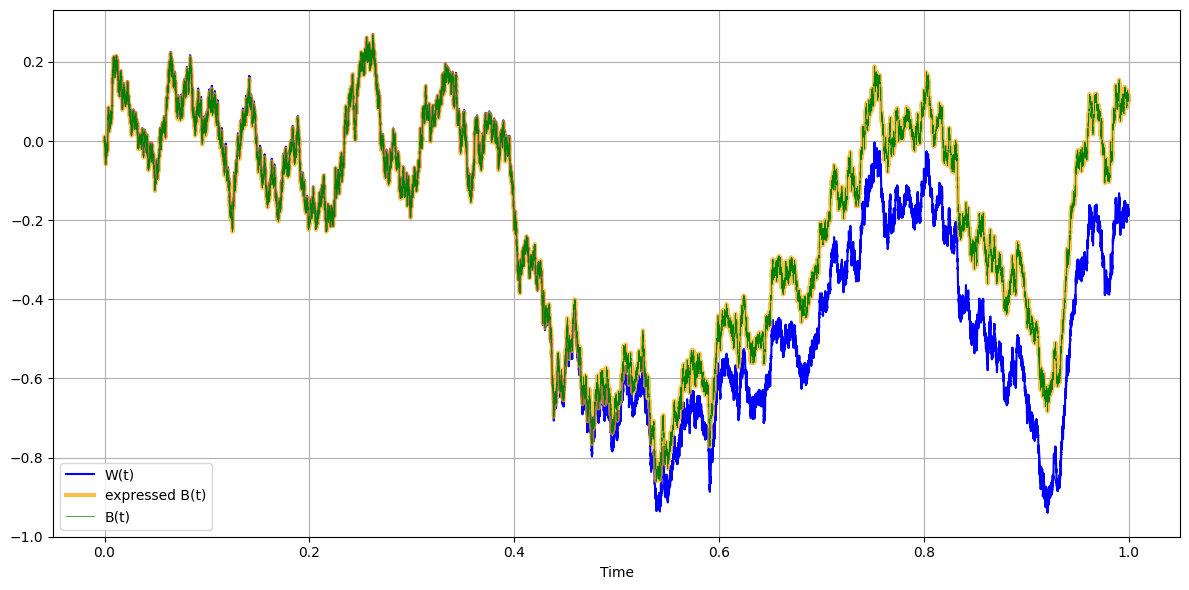

In [ ]:
one_path(1)

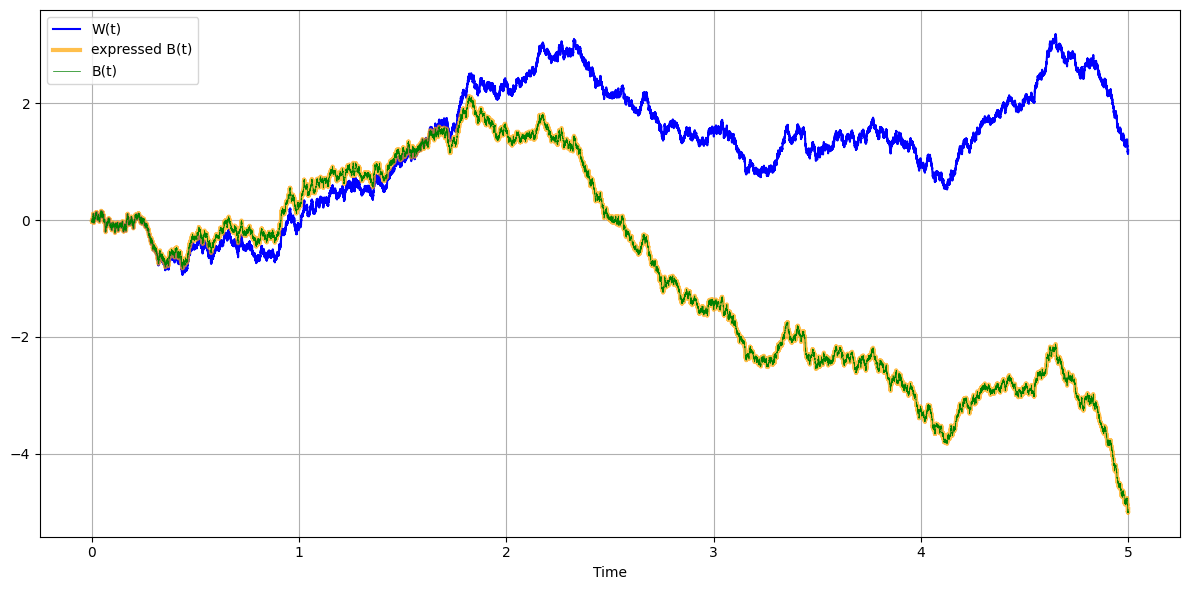

In [ ]:
one_path(5)

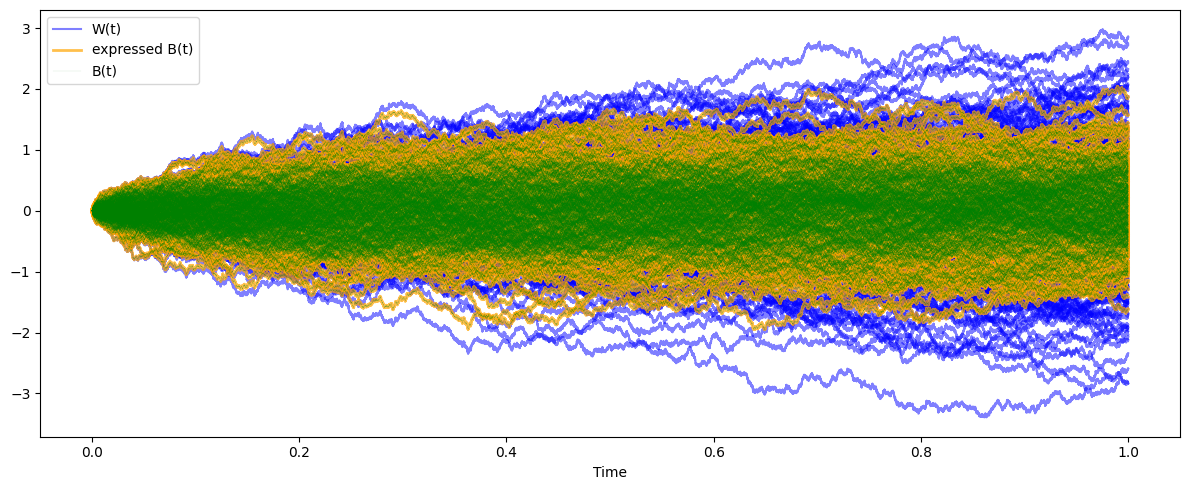

In [ ]:
T = 1
num_paths = 300
dt = T / n
dW = np.random.normal(0, np.sqrt(dt), size=n)
W = np.concatenate(([0], np.cumsum(dW)))
times = np.linspace(0, T, n + 1)
W_paths = np.zeros((num_paths, n+1))
B_paths = np.zeros((num_paths, n+1))
C_paths = np.zeros((num_paths, n+1))
intW = np.zeros((num_paths, n+1))

for j in range(num_paths):
  dW = np.random.normal(0, np.sqrt(dt), size=n)
  W_paths[j] = np.concatenate(([0], np.cumsum(dW)))
  for i in range(1, n+1):
      t = times[i]
      s = times[:i]
      B_paths[j][i] = np.sum((1 + s - t) * dW[:i])
      intW[j][i] = intW[j][i - 1] + W_paths[j][i-1] * dt
  C_paths[j] = W_paths[j] - intW[j]

plt.figure(figsize=(12, 5))
for j in range(num_paths):
  plt.plot(times, W_paths[j], color='blue', alpha=0.5, label='W(t)' if j == 0 else "")
for j in range(num_paths):
  plt.plot(times, B_paths[j], color='orange',  linewidth = 2, alpha=0.7,  label='expressed B(t)' if j == 0 else "")
for j in range(num_paths):
  plt.plot(times, C_paths[j], color='green', linewidth = 0.1, alpha=0.5, label='B(t)' if j == 0 else "")
plt.xlabel('Time')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

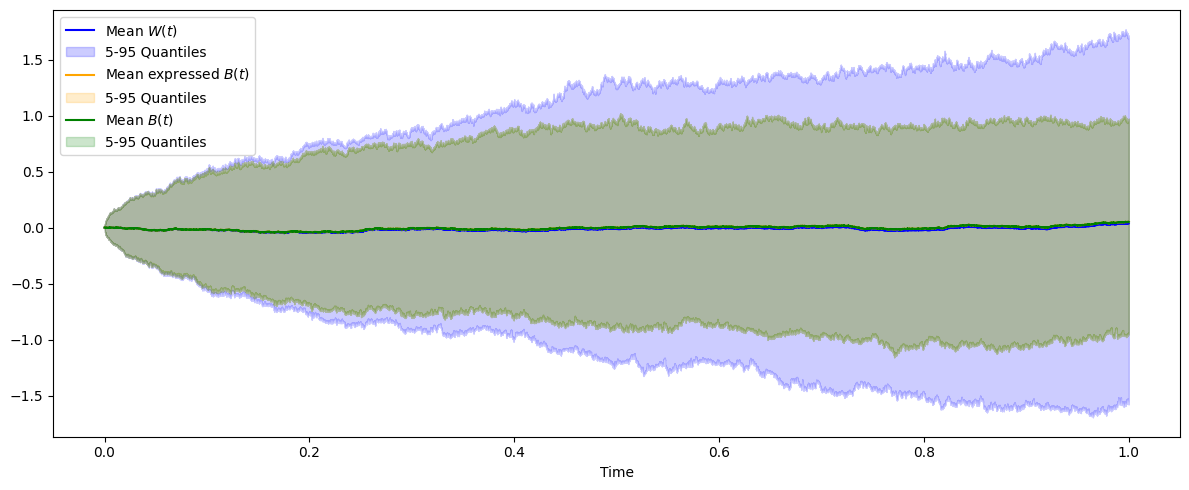

In [ ]:
mean_W = np.mean(W_paths, axis=0)
mean_B = np.mean(B_paths, axis=0)
mean_C = np.mean(C_paths, axis = 0)
q_W_5 = np.quantile(W_paths, 0.05, axis=0)
q_W_95 = np.quantile(W_paths, 0.95, axis=0)
q_B_5 = np.quantile(B_paths, 0.05, axis=0)
q_B_95 = np.quantile(B_paths, 0.95, axis=0)
q_C_5 = np.quantile(C_paths, 0.05, axis=0)
q_C_95 = np.quantile(C_paths, 0.95, axis=0)
plt.figure(figsize=(12, 5))
plt.plot(times, mean_W, color='blue', label='Mean $W(t)$')
plt.fill_between(times, q_W_5, q_W_95, color='blue', alpha=0.2, label='5-95 Quantiles')
plt.plot(times, mean_B, color='orange', label='Mean expressed $B(t)$')
plt.fill_between(times, q_B_5, q_B_95, color='orange', alpha=0.2, label='5-95 Quantiles')
plt.plot(times, mean_C, color='green', label='Mean $B(t)$')
plt.fill_between(times, q_C_5, q_C_95, color='green', alpha=0.2, label='5-95 Quantiles')
plt.xlabel('Time')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

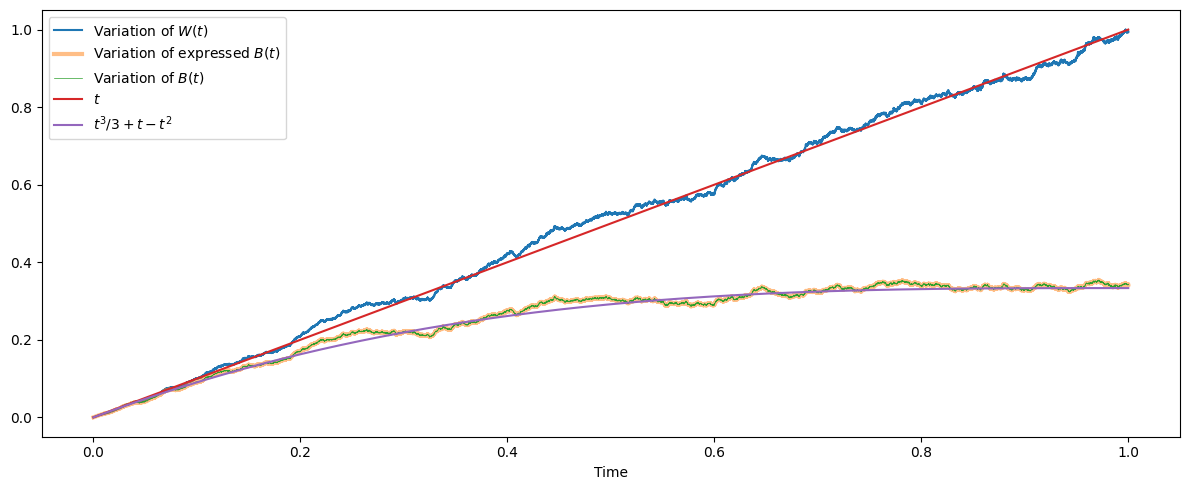

In [ ]:
var_W = np.var(W_paths, axis = 0)
var_B = np.var(B_paths, axis = 0)
var_C = np.var(C_paths, axis = 0)
plt.figure(figsize=(12, 5))
plt.plot(times, var_W, label='Variation of $W(t)$')
plt.plot(times, var_B, alpha=0.5, linewidth=3, label='Variation of expressed $B(t)$')
plt.plot(times, var_C, linewidth = 0.5, label='Variation of $B(t)$')
plt.plot(times, times, label='$t$')
plt.plot(times, (times**3/3 + times - times**2), label='$t^3/3 + t - t^2$')
plt.xlabel('Time')
plt.legend()
plt.tight_layout()
plt.show()

The resulting formula for the variance correlates quite well with the generated data!

# Task 6

Now assume that $\theta(t) = \theta$ is a constant. Note that if you discretize the solution of the Vasicek
process and rearrange it a bit, you could express it as an AR(1) process.

(a) Find some time-series data that you think is well described by the Vasicek
model. Explain, why do you think so. Plot the time series.

(b) Use the time-series to estimate an AR(1) process.

(c) Estimate Vasicek parameters.

(d) Give interpretation to each parameter.

Vasicek's model was originally proposed to describe the evolution of interest rates. Therefore, let us analyse historical data on 30-year US bond yields from 2010 to the present using a discretised model.

In [ ]:
df = pd.read_csv('/content/Прошлые данные доходности облигаций США 30-летние.csv')
df['Rate'] = df["Цена"].str.replace(',', '.').astype(float)
df['Date'] = pd.to_datetime(df['Дата'], dayfirst=True)
df.set_index('Date', inplace = True)
df = df[['Rate']]
df.sort_index(inplace=True)

df.head()

,Rate
Date,
2010-01-04,4.646
2010-01-05,4.613
2010-01-06,4.696
2010-01-07,4.686
2010-01-08,4.717


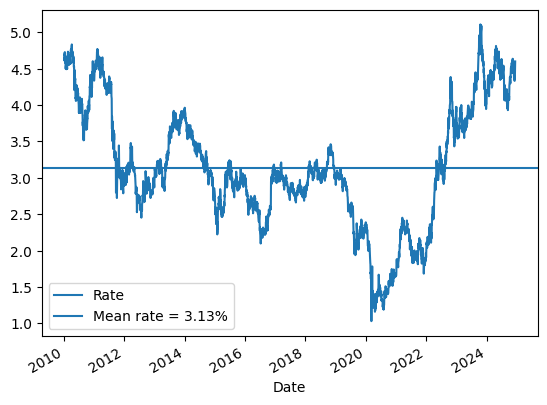

Volatility = 0.84


In [ ]:
df['Rate'].plot()
plt.axhline(df['Rate'].mean(), label = f"Mean rate = {round(df['Rate'].mean(), 2)}%")
plt.legend()
plt.show()
print(f"Volatility = {round(df['Rate'].std(), 2)}")

In [ ]:
p = 1
d = 0
q = 0
model = ARIMA(df['Rate'].to_numpy(), order=(p, d, q))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3881
Model:                 ARIMA(1, 0, 0)   Log Likelihood                5939.280
Date:                Sun, 15 Dec 2024   AIC                         -11872.560
Time:                        15:32:12   BIC                         -11853.769
Sample:                             0   HQIC                        -11865.889
                               - 3881                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1344      0.333      9.417      0.000       2.482       3.787
ar.L1          0.9980      0.001   1190.106      0.000       0.996       1.000
sigma2         0.0027   4.08e-05     67.070      0.0

$$
\sigma^2 = 0.0027\tau \Rightarrow \sigma \approx 0.05
$$


In Vasicek's model, $\sigma$ is the volatility parameter. However, it does not coincide quite strongly with the value calculated from historical data directly.I think this is due to the fact that the AR(1) model requires stationarity of the input data, which is not the case for our time series, so the actual calculated variance is larger.

There was obviously some funny thing with const - the long-term average was displayed, although we expect the long-term average multiplied by $\kappa$. Most likely, the reason is that the data are not particularly stationary, and therefore, when calculating under the bonnet, this may come out. So I'll calculate it additionally using linear regression:

In [ ]:
df['Delta'] = df['Rate'].diff()
df['PrevRate'] = df['Rate'].shift()
df.head()

,Rate,Delta,PrevRate
Date,,,
2010-01-04,4.646,NaN,NaN
2010-01-05,4.613,-0.033,4.646
2010-01-06,4.696,0.083,4.613
2010-01-07,4.686,-0.010,4.696
2010-01-08,4.717,0.031,4.686


In [ ]:
regr = LinearRegression()
x = df[['Rate']].iloc[:-1]
y = df['Delta'].dropna()
regr.fit(x, y)
print(regr.intercept_)
print(regr.coef_[0])

0.0061655315783093875
[-0.00197107]


In [ ]:
regr = LinearRegression()
x = df[['Rate']].iloc[1:]
y = df['PrevRate'].dropna()
regr.fit(x, y)
print(regr.intercept_)
print(regr.coef_[0])

0.006032384990088513
[0.99807898]


That's what we're getting:
$$
\kappa \theta \tau = 0.0061655\%
$$
$$
\kappa \tau = 0.00197107,
$$
so
$$
\kappa \approx 0.002 \;day^{-1}, \;\; \theta = 3,13\%
$$

In Vasicek's model, $\theta$ is the average (long-term) level of interest rate, $\kappa$ is a parameter characterising the rate of return to the average value. This agrees quite well with the calculated average from historical data.